# <span style="color:green"> Data Findings -Loan dataset from Prosper
### By Carolyne Kemunto Machuka 

## Data set
This data set contains 113,937 loans with 81 variables on each loan.The key column of interest for this analysis   include original loan amount, borrower rate (or interest rate), monthly loan repayment,bank credit utization,loan status, income range, employment status,lender's yield,investors and maturity term.
 
##  Data analysis Overview
### Question of interest
 - What factors affect choice of loan term.
 - What factors determine the original loan amount for a borrower.
 - what is the impact of interest rate on borrowing.
 - What are the derminants of loan outcome
 

### Key Insights 
- Lender’s yield has a perfect positive correlation of 1 with interest rate hence is the key factor affecting interest rate. High lender’s yield results to an equal high rate of interest for borrowers.
- 36 months attracts the largest number of borrowers because it has the lowest monthly payment. 12-month loan term offers the lowest interest rate but borrowers shy away from it due to high monthly payment deduction during this duration.  Borrowers seem to focus more on the monthly payment rather than lower interest rates
- Heavy consumers of loans are middle income earners earning between 25,000 and 74,999, interestingly followed by high income earners earning 75,000+. Subsequently, middle income earners, receive the largest loan amount and pay the largest monthly payment.
- Higher loan amount has lower yield rate and thus lower interest rate. However, they attract high monthly payment thus shying away borrowers who forego this low interest rates incentives it provides to have a little more in their pockets after their monthly payment deduction.
- Loan amount has a strong correlation of 0.93 with monthly payment implying that as principal amount increases the monthly payment will proportionately increase and vice versa. However, loan amount seems to have a weak positive correlation with number of investors and available bank card credit. 
- Employed and Full time personnel are leading in completed loans. Interestingly, they are also leading in defaulted loans, probably due to large number of borrowers in this category. All the employment status have defaulters, though their proportion of 0.0316 is relatively small




In [1]:
#importing relevant packages
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

#### Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.0

In [63]:
# importing prosperLoanData
loan_data=pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Preliminary_Assessment for dataset columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [64]:
# Preliminary_Assessment for duplicates
loan_data['ListingKey'].duplicated().sum()

871

# Data assessment: Quality and Tidiness
- Retaining relevant columns only
- Nulls in columns occupation,employment status,employment status duration,bank card credit utilization, available bank card credit and inquiries in the last 6 months
- Duplicate data
- Convertion of date to datetime data type
- Convertion of LoanStatus to categorical data

# Cleaning data


In [85]:
# Making a copy of the original data
loan_data_clean = loan_data.copy()


In [86]:
#Retaining relevant columns
loan_data_clean=loan_data_clean[['LoanNumber','ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','Term','MonthlyLoanPayment','BorrowerRate','LenderYield','IncomeRange','Occupation','EmploymentStatus','EmploymentStatusDuration','Investors','BankcardUtilization','AvailableBankcardCredit','InquiriesLast6Months']]
loan_data_clean.sample(10)                          

,LoanNumber,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,Term,MonthlyLoanPayment,BorrowerRate,LenderYield,IncomeRange,Occupation,EmploymentStatus,EmploymentStatusDuration,Investors,BankcardUtilization,AvailableBankcardCredit,InquiriesLast6Months
84319,111082,973472,2013-10-28 11:27:08.847000000,25000,Current,36,859.31,0.1440,0.1340,"$100,000+",Computer Programmer,Employed,67.0,1,0.90,2166.0,0.0
67811,49876,508384,2011-05-25 14:01:42.230000000,5000,Chargedoff,36,204.10,0.2699,0.2599,"$25,000-49,999",Other,Employed,13.0,73,0.61,17105.0,1.0
37792,77136,661687,2012-10-27 08:45:42.060000000,3000,Current,60,86.57,0.2415,0.2315,"$75,000-99,999",Other,Employed,68.0,42,0.89,115.0,3.0
54477,47730,497478,2011-03-11 08:10:44.627000000,3000,Current,36,130.65,0.3199,0.3099,"$25,000-49,999",Nurse (RN),Employed,44.0,30,0.95,251.0,1.0
48338,93830,816994,2013-06-20 19:19:29.773000000,9500,Current,60,250.85,0.1984,0.1884,"$100,000+",Executive,Self-employed,201.0,1,0.85,23806.0,0.0
59345,96955,838867,2013-07-13 16:40:53.713000000,15000,Current,60,343.91,0.1334,0.1234,"$75,000-99,999",Professional,Employed,153.0,1,0.73,16648.0,0.0
79620,3344,37866,2006-09-08 14:51:54.083000000,1500,Defaulted,36,55.75,0.2000,0.1825,Not displayed,NaN,NaN,NaN,1,NaN,NaN,4.0
97592,86597,716866,2013-02-21 05:27:21.430000000,15000,Current,60,372.71,0.1699,0.1599,"$75,000-99,999",Professional,Employed,110.0,165,0.76,8775.0,0.0
17467,16268,153571,2007-06-17 16:43:14.763000000,12000,Completed,36,466.40,0.2330,0.2230,"$50,000-74,999",Other,Full-time,303.0,141,0.66,2257.0,8.0
108824,66706,591199,2012-05-21 06:53:08.940000000,4000,Current,36,159.02,0.2499,0.2399,"$25,000-49,999",Nurse's Aide,Employed,148.0,12,0.38,6183.0,0.0


In [18]:
#checking data structure, data types and null columns
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LoanNumber                113937 non-null  int64  
 1   ListingNumber             113937 non-null  int64  
 2   ListingCreationDate       113937 non-null  object 
 3   LoanOriginalAmount        113937 non-null  int64  
 4   LoanStatus                113937 non-null  object 
 5   Term                      113937 non-null  int64  
 6   MonthlyLoanPayment        113937 non-null  float64
 7   BorrowerRate              113937 non-null  float64
 8   LenderYield               113937 non-null  float64
 9   IncomeRange               113937 non-null  object 
 10  Occupation                110349 non-null  object 
 11  EmploymentStatus          111682 non-null  object 
 12  EmploymentStatusDuration  106312 non-null  float64
 13  Investors                 113937 non-null  i

In [87]:
#dropping rows with null values
loan_data_clean.dropna(inplace=True)


In [88]:
# Testing if null values have been dropped
loan_data_clean.isna().any()

LoanNumber                  False
ListingNumber               False
ListingCreationDate         False
LoanOriginalAmount          False
LoanStatus                  False
Term                        False
MonthlyLoanPayment          False
BorrowerRate                False
LenderYield                 False
IncomeRange                 False
Occupation                  False
EmploymentStatus            False
EmploymentStatusDuration    False
Investors                   False
BankcardUtilization         False
AvailableBankcardCredit     False
InquiriesLast6Months        False
dtype: bool

In [89]:
#Converting data type 
loan_data_clean['ListingCreationDate']=loan_data_clean['ListingCreationDate'].astype('datetime64[ns]')
loan_data_clean['LoanStatus']=loan_data_clean['LoanStatus'].astype('category')


In [24]:
#checking  converted datatypes
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104963 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   LoanNumber                104963 non-null  int64         
 1   ListingNumber             104963 non-null  int64         
 2   ListingCreationDate       104963 non-null  datetime64[ns]
 3   LoanOriginalAmount        104963 non-null  int64         
 4   LoanStatus                104963 non-null  category      
 5   Term                      104963 non-null  category      
 6   MonthlyLoanPayment        104963 non-null  float64       
 7   BorrowerRate              104963 non-null  float64       
 8   LenderYield               104963 non-null  float64       
 9   IncomeRange               104963 non-null  object        
 10  Occupation                104963 non-null  object        
 11  EmploymentStatus          104963 non-null  object        
 12  Em

In [148]:
#checking for duplicates
loan_data_clean.duplicated().sum()

812

In [149]:
#Checking for duplicates in column loan number
loan_data_clean['LoanNumber'].duplicated().sum()

812

In [150]:
#Checking for duplicates in column listing number
loan_data_clean['ListingNumber'].duplicated().sum()

812

In [151]:
#Checking for duplicates in column creation date
loan_data_clean['ListingCreationDate'].duplicated().sum()

814

In [165]:
# Assessing duplicated data
loan_data_clean_duplicated=loan_data_clean[loan_data_clean.duplicated(subset=['LoanNumber','ListingNumber','ListingCreationDate'])]
loan_data_clean_duplicated.head(10)

,LoanNumber,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,Term,MonthlyLoanPayment,BorrowerRate,LenderYield,IncomeRange,Occupation,EmploymentStatus,EmploymentStatusDuration,Investors,BankcardUtilization,AvailableBankcardCredit,InquiriesLast6Months
9,121268,1023355,2013-12-02 10:43:39.117,10000,Current,36,305.54,0.0629,0.0529,"$25,000-49,999",Food Service,Employed,269.0,1,0.11,77696.0,1.0
999,132043,1055932,2013-12-18 14:25:17.053,10000,Current,60,239.74,0.1535,0.1435,"$25,000-49,999",Other,Employed,100.0,1,0.27,14190.0,1.0
2539,135375,1097584,2014-01-11 07:50:08.037,35000,Current,60,782.81,0.1224,0.1124,"$100,000+",Police Officer/Correction Officer,Employed,107.0,1,0.40,26503.0,1.0
4942,103928,927246,2013-09-26 09:35:36.317,4000,Current,36,172.76,0.3134,0.3034,"$50,000-74,999",Laborer,Employed,336.0,40,0.51,798.0,3.0
5971,106952,894748,2013-09-16 06:59:12.297,10000,Current,60,244.24,0.1620,0.1520,"$25,000-49,999",Civil Service,Employed,325.0,1,0.72,4378.0,0.0
6385,127050,1066466,2013-12-10 13:39:07.220,10000,Current,36,317.02,0.0879,0.0779,"$100,000+",Professional,Employed,27.0,1,1.00,0.0,3.0
7415,108650,875616,2013-08-21 07:25:22.360,10000,Current,60,276.70,0.2209,0.2109,"$50,000-74,999",Clerical,Employed,23.0,75,0.93,3700.0,2.0
7538,122367,969821,2013-10-24 13:21:31.607,5000,Current,36,177.89,0.1685,0.1585,"$100,000+",Other,Employed,95.0,1,0.99,891.0,0.0
7555,122869,970570,2013-11-01 13:53:22.000,10000,Current,36,322.20,0.0990,0.0890,"$25,000-49,999",Construction,Self-employed,107.0,1,0.85,3201.0,0.0
8683,129414,1047993,2013-11-25 08:46:13.073,4000,Current,36,142.31,0.1685,0.1585,"$25,000-49,999",Accountant/CPA,Employed,49.0,1,0.32,8793.0,0.0


In [90]:
#dropping duplicates
loan_data_clean.drop_duplicates(inplace=True,ignore_index=True)

In [91]:
#Check if duplicates have dropped
loan_data_clean.duplicated().sum()

0

In [207]:
loan_data_clean.shape

(104151, 17)

In [105]:
loan_data_clean.tail()

,LoanNumber,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,Term,MonthlyLoanPayment,BorrowerRate,LenderYield,IncomeRange,Occupation,EmploymentStatus,EmploymentStatusDuration,Investors,BankcardUtilization,AvailableBankcardCredit,InquiriesLast6Months
104146,88485,753087,2013-04-14 05:55:02.663,10000,Current,36,364.74,0.1864,0.1764,"$50,000-74,999",Food Service Management,Employed,246.0,1,0.80,1886.0,0.0
104147,55801,537216,2011-11-03 20:42:55.333,2000,FinalPaymentInProgress,36,65.57,0.1110,0.1010,"$75,000-99,999",Professional,Employed,21.0,22,0.69,6658.0,1.0
104148,123122,1069178,2013-12-13 05:49:12.703,10000,Current,60,273.35,0.2150,0.2050,"$25,000-49,999",Other,Employed,84.0,119,0.73,7853.0,1.0
104149,56401,539056,2011-11-14 13:18:26.597,15000,Completed,60,449.55,0.2605,0.2505,"$25,000-49,999",Food Service,Full-time,94.0,274,0.69,4137.0,1.0
104150,127508,1140093,2014-01-15 09:27:37.657,2000,Current,36,64.90,0.1039,0.0939,"$50,000-74,999",Professor,Employed,244.0,1,0.80,675.0,0.0


# Storing data

In [92]:
loan_data_clean.to_csv('tidy_loan_data1.csv', index=False)

## Data analysis and visualization

In [2]:
#Importing dataframe for analysis
tidy_loan_data=pd.read_csv('tidy_loan_data1.csv')
tidy_loan_data.head(20617)

,LoanNumber,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,Term,MonthlyLoanPayment,BorrowerRate,LenderYield,IncomeRange,Occupation,EmploymentStatus,EmploymentStatusDuration,Investors,BankcardUtilization,AvailableBankcardCredit,InquiriesLast6Months
0,19141,193129,2007-08-26 19:09:29.263,9425,Completed,36,330.43,0.1580,0.1380,"$25,000-49,999",Other,Self-employed,2.0,258,0.00,1500.0,3.0
1,134815,1209647,2014-02-27 08:28:07.900,10000,Current,36,318.93,0.0920,0.0820,"$50,000-74,999",Professional,Employed,44.0,1,0.21,10266.0,3.0
2,77296,658116,2012-10-22 11:02:35.010,10000,Current,36,321.45,0.0974,0.0874,"$25,000-49,999",Skilled Labor,Employed,113.0,158,0.04,30754.0,0.0
3,102670,909464,2013-09-14 18:38:39.097,15000,Current,36,563.97,0.2085,0.1985,"$100,000+",Executive,Employed,44.0,20,0.81,695.0,1.0
4,123257,1074836,2013-12-14 08:26:37.093,15000,Current,60,342.37,0.1314,0.1214,"$100,000+",Professional,Employed,82.0,1,0.39,86509.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20612,86844,735609,2013-03-21 19:26:50.800,10000,Completed,36,339.79,0.1359,0.1259,"$100,000+",Truck Driver,Self-employed,87.0,129,0.58,15290.0,0.0
20613,97306,851048,2013-07-25 10:16:06.660,4000,Current,36,168.32,0.2932,0.2832,"$25,000-49,999",Other,Employed,1.0,1,0.64,2559.0,0.0
20614,110343,1032894,2013-11-13 06:11:32.903,10000,Current,36,339.30,0.1349,0.1249,"$25,000-49,999",Accountant/CPA,Employed,183.0,1,0.76,883.0,0.0
20615,94421,814660,2013-06-19 08:19:48.477,10000,Current,60,257.98,0.1874,0.1774,"$100,000+",Nurse (RN),Employed,14.0,173,0.25,26794.0,1.0


In [3]:
#Converting data type 
tidy_loan_data['ListingCreationDate']=tidy_loan_data['ListingCreationDate'].astype('datetime64[ns]')
tidy_loan_data['LoanStatus']=tidy_loan_data['LoanStatus'].astype('category')


### Question 1
- What affects length of the loan term 
- Is there a relationship between incomeRange and Term.

In [90]:
#Unique values of loan
tidy_loan_data['Term'].unique()

array([36, 60, 12], dtype=int64)

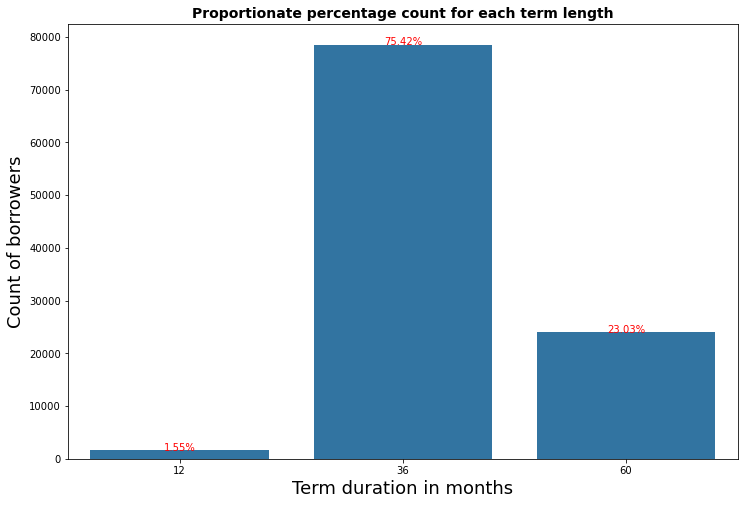

In [44]:
#Summing each term count
Term_count_sum=tidy_loan_data['Term'].value_counts().sum()


#Plotting and percentage count annotating
plt.figure(figsize = [12, 8])
base_color=sb.color_palette()[0]
ax=sb.countplot(data=tidy_loan_data, x='Term',color=base_color)

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/Term_count_sum)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',color='red')
plt.title('Proportionate percentage count for each term length',fontsize=14 ,weight='bold')
plt.xlabel('Term duration in months',fontsize=18)
plt.ylabel('Count of borrowers',fontsize=18)
plt.show()

#### Most customers take loans upto to a length of 36 months. Why so? We seek to answer this 


In [8]:
#Find mean monthly payment
MeanMonthlyPayment_forEachTerm=tidy_loan_data.groupby(['Term'],as_index=True)['MonthlyLoanPayment'].mean()
MeanMonthlyPayment_forEachTerm

Term
12    383.933408
36    265.285661
60    315.864263
Name: MonthlyLoanPayment, dtype: float64

In [9]:
#Find sum of mean monthly payment
SumGroupMean=sum(tidy_loan_data.groupby(['Term'],as_index=True)['MonthlyLoanPayment'].mean())
SumGroupMean

965.0833313377409

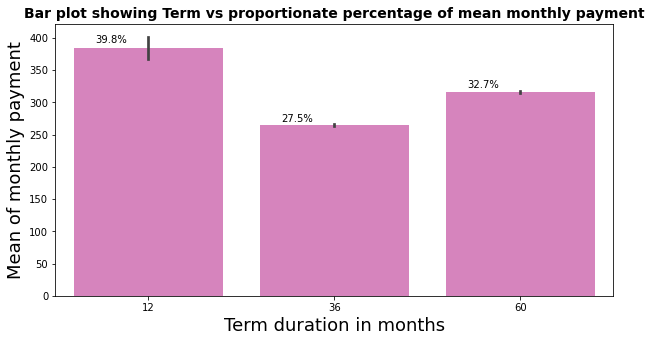

In [10]:
#plotting
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[6]
ax=sb.barplot(data=tidy_loan_data, x='Term', y='MonthlyLoanPayment',color=base_color)
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{(height/SumGroupMean):.1%}', (x + width/4, y + height*1.02), ha='center')

plt.xticks(rotation=0)
plt.title('Bar plot showing Term vs proportionate percentage of mean monthly payment',fontsize=14 ,weight='bold')
plt.xlabel('Term duration in months',fontsize=18)
plt.ylabel('Mean of monthly payment',fontsize=18);
 

#### 36 months  has the lowest  mean monthly payment hence the most preferred term, could there be other reasons, we seek to find out

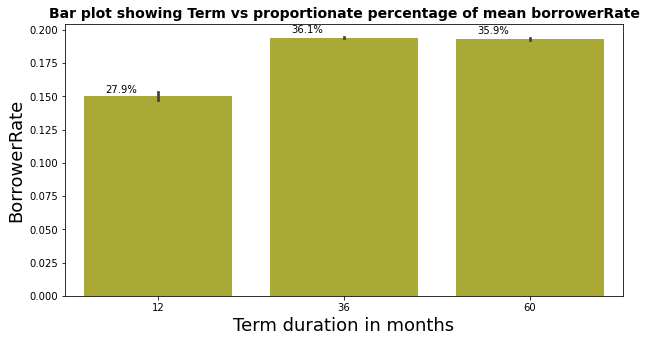

In [7]:
#summing the mean of BorrowerRate for each Term
SumGroupMean_BorrowerRate=sum(tidy_loan_data.groupby(['Term'],as_index=True)['BorrowerRate'].mean())

#plotting
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[8]
ax=sb.barplot(data=tidy_loan_data, x='Term', y='BorrowerRate',color=base_color)
for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{(height/SumGroupMean_BorrowerRate):.1%}', (x + width/4, y + height*1.02), ha='center')

plt.xticks(rotation=0)
plt.title('Bar plot showing Term vs proportionate percentage of mean borrowerRate',fontsize=14 ,weight='bold')
plt.xlabel('Term duration in months',fontsize=18)
plt.ylabel('BorrowerRate',fontsize=18);

#### 36 months seem to have the highest mean interest rate of borrowing, this could be attributed to the lowest monthly payment in this term. Comparably, 12 months has the lowest interest rate due to the highest monthly payment paid during this period.

In [45]:
#Checking unique values of income
tidy_loan_data['IncomeRange'].value_counts()

$25,000-49,999    31354
$50,000-74,999    30422
$100,000+         17147
$75,000-99,999    16688
$1-24,999          6982
Not employed        802
$0                  618
Not displayed       138
Name: IncomeRange, dtype: int64

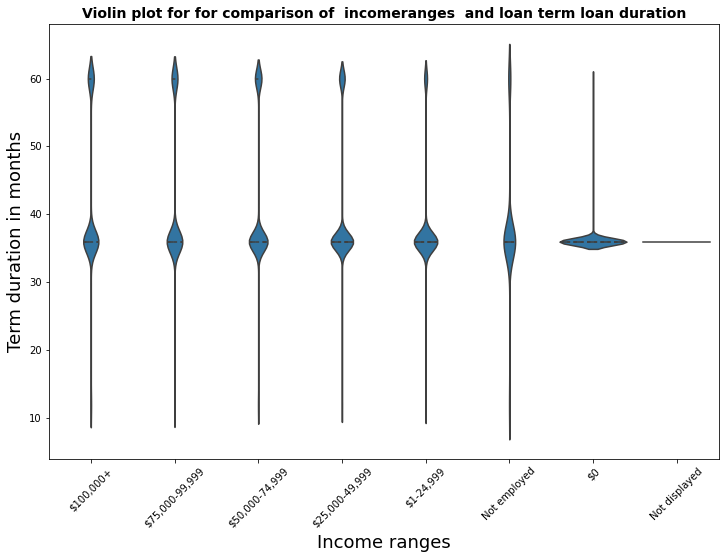

In [18]:
# Returns the types income_classes with the categories and orderedness
income_classes = ['$100,000+', '$75,000-99,999','$50,000-74,999','$25,000-49,999', '$1-24,999', 'Not employed', '$0','Not displayed']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=income_classes)
 
tidy_loan_data['IncomeRange'] = tidy_loan_data['IncomeRange'].astype(vclasses)

#plotting
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]

sb.violinplot(data=tidy_loan_data, x='IncomeRange',y ='Term', color=base_color,inner='quartile')
plt.xticks(rotation=45)
plt.title('Violin plot for for comparison of  incomeranges  and loan term loan duration',fontsize=14 ,weight='bold')
plt.xlabel('Income ranges',fontsize=18)
plt.ylabel('Term duration in months',fontsize=18);




#### Majority of borrowers who take loans for 60 months earn $25,000+

In [19]:
# Using group_by() and size() to get the number of  incomeRange and each combination of the two variable levels as a pandas Series

counts = tidy_loan_data.groupby(['IncomeRange', 'Term']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = 'IncomeRange', columns = 'Term', values = 'count')
counts

Term,12,36,60
IncomeRange,,,
"$100,000+",387,12023,4737
"$75,000-99,999",311,11871,4506
"$50,000-74,999",432,22241,7749
"$25,000-49,999",381,24842,6131
"$1-24,999",77,6164,741
Not employed,26,662,114
$0,0,614,4
Not displayed,0,138,0


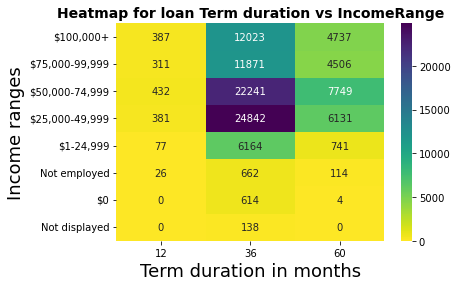

In [95]:
# Plotting heatmap
sb.heatmap(counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.xticks(rotation=0)
plt.title('Heatmap for loan Term duration vs IncomeRange',fontsize=14 ,weight='bold')
plt.xlabel('Term duration in months',fontsize=18)
plt.ylabel('Income ranges', fontsize=18);


#### Major consumers of loan are middle income persons earning between 25,000 to 74,999 taking it for 36 months, then interestingly, followed by high income earners of 75,000+.  

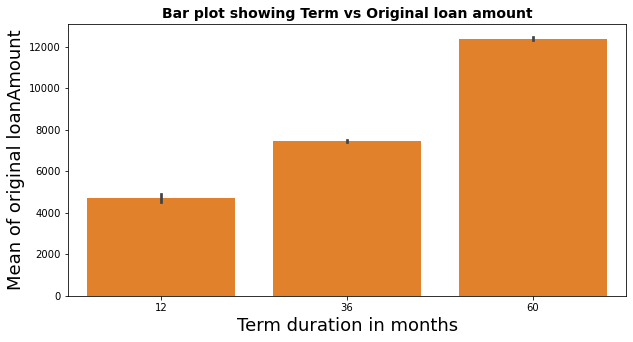

In [47]:
#Plotting mean of original loan amount for each term
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.barplot(data=tidy_loan_data, x='Term', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=0)
plt.title('Bar plot showing Term vs Original loan amount',fontsize=14 ,weight='bold')
plt.xlabel('Term duration in months',fontsize=18)
plt.ylabel('Mean of original loanAmount',fontsize=18);


#### The original principal amount increases steadily with increase in term duration.The greatest original principal amount is taken up by those who pay for their loan up to 60 months.

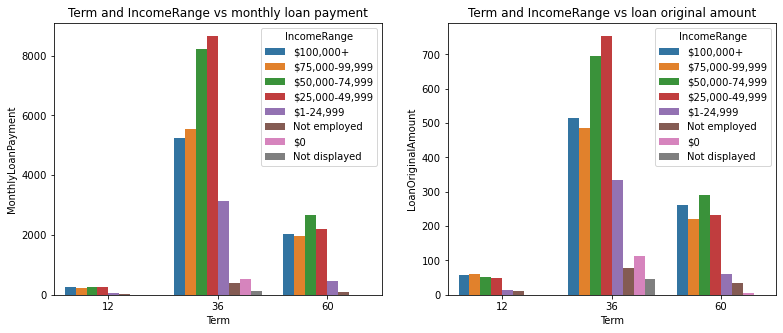

In [98]:
plt.figure(figsize = [20, 5])
#Right plot: Term and IncomeRange vs monthly loan payment
plt.subplot(1, 3,1 )

df_agg= tidy_loan_data.groupby(['Term','IncomeRange'])['MonthlyLoanPayment'].nunique().reset_index()
sb.barplot(x='Term', y='MonthlyLoanPayment', hue='IncomeRange',data=df_agg)
plt.title('Term and IncomeRange vs monthly loan payment')

#Left plot: Term and IncomeRange vs loan original amount
plt.subplot(1, 3,2 )

df_agg2= tidy_loan_data.groupby(['Term','IncomeRange'])['LoanOriginalAmount'].nunique().reset_index()
sb.barplot(x='Term', y='LoanOriginalAmount', hue='IncomeRange',data=df_agg1)
plt.title('Term and IncomeRange vs loan original amount');



##### Those who pay the highest monthly payment earn between  $25,000-49,999$.They pay the loan for 36 months. Interestingly, they also take up the largest amount of the original loan amount for the same period. For those paying it for 60 months, the IncomeRange of $50,000-74,999 pays the highest monthly payment and receives the largest original loan amount

### Question 2
- What affects the original loan amount 
- What is the correlation of investors, interest rate, available bank credit,lenderyield,monthly payment and the original loan amount.

In [60]:
tidy_loan_data['LoanOriginalAmount'].describe()

count    104151.000000
mean       8554.490903
std        6268.877390
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

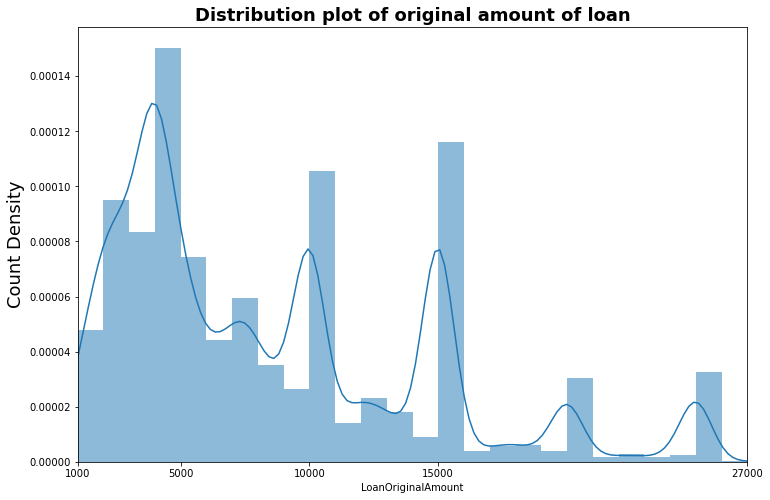

In [56]:
#Plotting histogram
plt.figure(figsize = [12, 8])
bins =np.arange(0, tidy_loan_data['LoanOriginalAmount'].max()+1000, 1000)
ticks = [1000,5000,10000, 15000,27000]

# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

sb.distplot(tidy_loan_data['LoanOriginalAmount'],bins=bins,hist_kws = {'alpha' : 0.5})

plt.xlim((1000,27000))

plt.xticks(ticks, labels)
plt.title('Distribution plot of original amount of loan',fontsize=18,weight='bold')
plt.ylabel('Count Density',fontsize=18);

##### The histogram is skewed to the left . Most borrowers took a loan of between 1000 to 15,000, with majority being on the lower side. A small proportion takes a loan beyond 15000, why do borrowers prefer a small principal amount?  We seek to answer

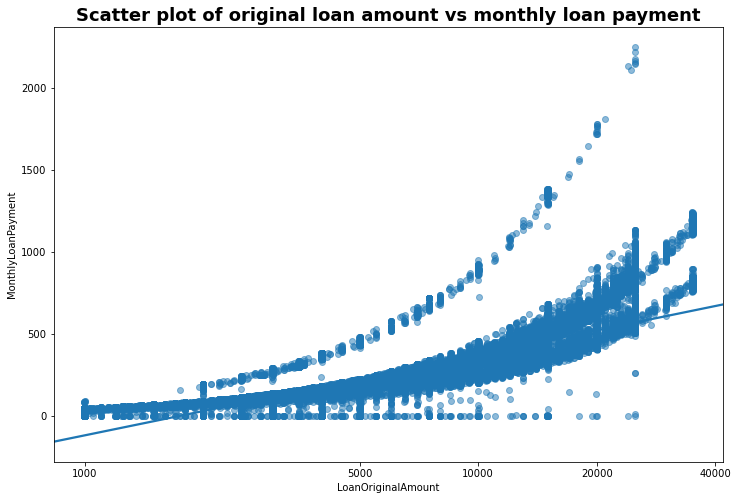

In [66]:
plt.figure(figsize = [12, 8])
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(tidy_loan_data['LoanOriginalAmount'].apply(log_trans), tidy_loan_data['MonthlyLoanPayment'],truncate=False, x_jitter=0.001,scatter_kws={'alpha':0.5})
tick_locs = [1000,5000,10000,20000,40000]

plt.xticks(log_trans(tick_locs), tick_locs)
plt.title('Scatter plot of original loan amount vs monthly loan payment',fontsize=18,weight='bold');


#### Monthly loan payment has a positive correlation with loan original amount. Implying a low loan amount attracts a low monthly payment hence the preference by majority.

In [80]:
tidy_loan_data['BorrowerRate'].describe()


count    104151.000000
mean          0.193326
std           0.075462
min           0.000000
25%           0.133400
50%           0.184000
75%           0.252400
max           0.360000
Name: BorrowerRate, dtype: float64

In [123]:
tidy_loan_data['Investors'].describe()


count    104151.000000
mean         82.540696
std         105.251019
min           1.000000
25%           1.000000
50%          45.000000
75%         119.000000
max        1189.000000
Name: Investors, dtype: float64

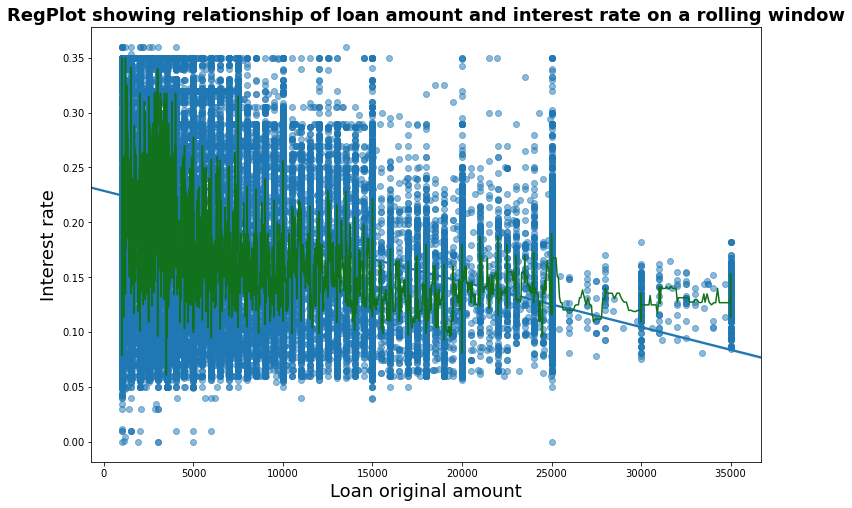

In [57]:
plt.figure(figsize = [12, 8])
# compute statistics in a rolling window
df_window = tidy_loan_data.sort_values('LoanOriginalAmount').rolling(15)
x_winmean = df_window.mean()['LoanOriginalAmount']
y_median = df_window.median()['BorrowerRate']
y_q1 = df_window.quantile(.25)['BorrowerRate']
y_q3 = df_window.quantile(.75)['BorrowerRate']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[2]
sb.regplot(data = tidy_loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate',truncate=False, x_jitter=0.001,scatter_kws={'alpha':0.5})
plt.errorbar(x = x_winmean, y = y_median, c = line_color)

plt.title('RegPlot showing relationship of loan amount and interest rate on a rolling window',fontsize=18,weight='bold')
plt.xlabel('Loan original amount', fontsize=18)
plt.ylabel('Interest rate',fontsize=18);

#### There is a negative correlation between loan original amount and the interest rate. As loan original amount increases the interst rate decreases.

In [23]:
#binning loanoriginal amount
bin_edges = np.arange(0, 35000+500, 500)
bin_centers = bin_edges[:-1] + 1

# Cut the bin values x into discrete intervals of a series object.
loanamount_binned = pd.cut(tidy_loan_data['LoanOriginalAmount'], bin_edges, include_lowest = True)
loanamount_binned

0           (9000.0, 9500.0]
1          (9500.0, 10000.0]
2          (9500.0, 10000.0]
3         (14500.0, 15000.0]
4         (14500.0, 15000.0]
                 ...        
104146     (9500.0, 10000.0]
104147      (1500.0, 2000.0]
104148     (9500.0, 10000.0]
104149    (14500.0, 15000.0]
104150      (1500.0, 2000.0]
Name: LoanOriginalAmount, Length: 104151, dtype: category
Categories (70, interval[float64, right]): [(-0.001, 500.0] < (500.0, 1000.0] < (1000.0, 1500.0] < (1500.0, 2000.0] ... (33000.0, 33500.0] < (33500.0, 34000.0] < (34000.0, 34500.0] < (34500.0, 35000.0]]

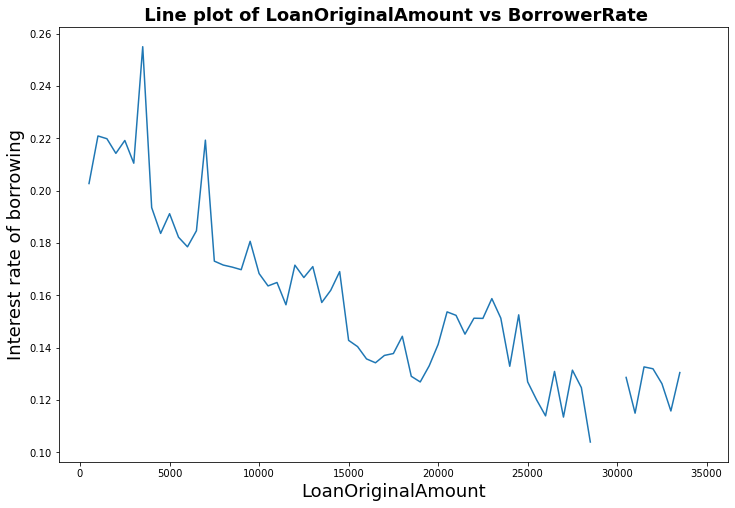

In [24]:
# Finding summary statistics to plot
borrowerRate_mean = tidy_loan_data['BorrowerRate'].groupby(loanamount_binned).mean()
borrowerRate_std = tidy_loan_data['BorrowerRate'].groupby(loanamount_binned).std()

# Plot the summarized data
plt.figure(figsize = [12, 8])
plt.errorbar(x=bin_centers, y=borrowerRate_mean)
plt.xticks(rotation=0)
plt.title(' Line plot of LoanOriginalAmount vs BorrowerRate', fontsize=18,weight='bold')
plt.xlabel('LoanOriginalAmount', fontsize=18)
plt.ylabel('Interest rate of borrowing', fontsize=18);

#### Higher loan amounts have the lowest interest rate of borrowing.

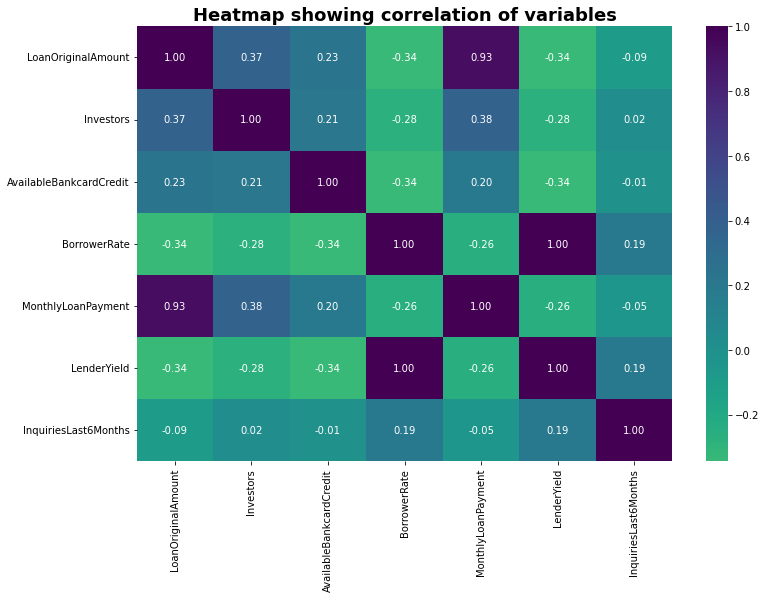

In [4]:
# Extracting variables of interest to plot on a heatmap showing their correlation
df = tidy_loan_data[['LoanOriginalAmount','Investors', 'AvailableBankcardCredit','BorrowerRate','MonthlyLoanPayment','LenderYield','InquiriesLast6Months']] 

#Plotting
plt.figure(figsize = [12, 8])
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='viridis_r', center = 0)
plt.xticks(rotation=90)
plt.title('Heatmap showing correlation of variables',fontsize=18,weight='bold');


- Loan amount has a strong positive correlation with monthly payment of 0.93, hence a low amount  of loan will attract low monthly payment thus  prefered by majority of borrowers.
- Loan amount has a weak positive correlation with investors and available bankcard credit. On the contrary it has a weak negative correlation with interest rate and lender's yield.
- Lender's yield and interest rate of borrowing have a perfect positive correlation of 1

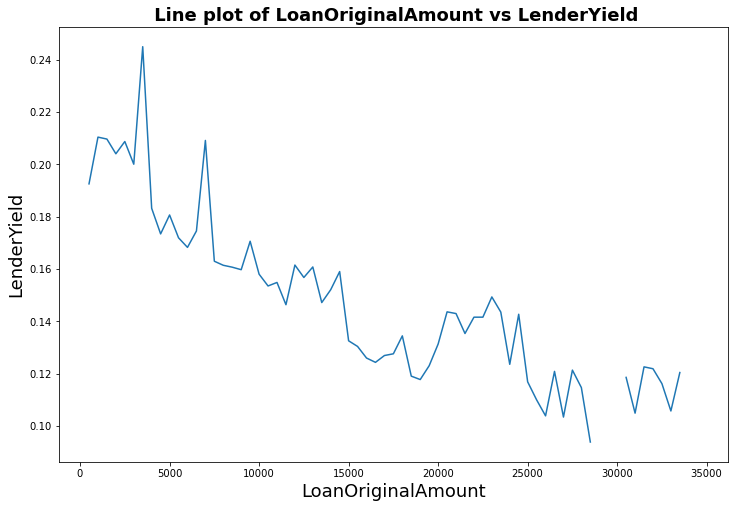

In [25]:
#binning loanoriginal amount
bin_edges = np.arange(0, 35000+500, 500)
bin_centers = bin_edges[:-1] + 1

# Cut the bin values x into discrete intervals of a series object.
loanamount_binned = pd.cut(tidy_loan_data['LoanOriginalAmount'], bin_edges, include_lowest = True)

lenderyield_mean = tidy_loan_data['LenderYield'].groupby(loanamount_binned).mean()
lenderyield_std = tidy_loan_data['LenderYield'].groupby(loanamount_binned).std()

# Plot the summarized data
plt.figure(figsize = [12, 8])
plt.errorbar(x=bin_centers, y=lenderyield_mean)
plt.xticks(rotation=0)
plt.title(' Line plot of LoanOriginalAmount vs LenderYield', fontsize=18,weight='bold')
plt.xlabel('LoanOriginalAmount', fontsize=18)
plt.ylabel('LenderYield', fontsize=18);

##### Higher loan amount earn the lowest rate of yield.

### Question 3
- What affects the interest rate of a borrower


In [169]:
tidy_loan_data['LenderYield'].describe()

count    104151.000000
mean          0.183201
std           0.075229
min          -0.010000
25%           0.123400
50%           0.173700
75%           0.241100
max           0.340000
Name: LenderYield, dtype: float64

In [138]:
tidy_loan_data['BorrowerRate'].describe()

count    104151.000000
mean          0.193326
std           0.075462
min           0.000000
25%           0.133400
50%           0.184000
75%           0.252400
max           0.360000
Name: BorrowerRate, dtype: float64

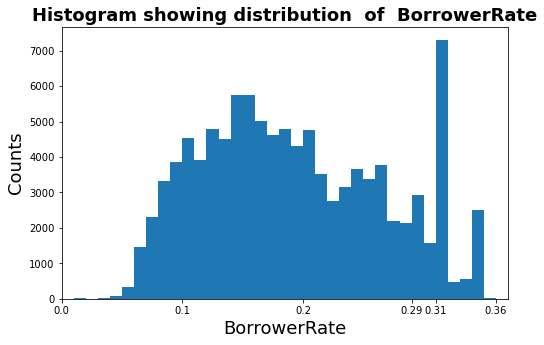

In [78]:
plt.figure(figsize = [8, 5])
bins =np.arange(0, tidy_loan_data['BorrowerRate'].max()+0.01, 0.01)
ticks = [0.0,0.1,0.2,0.29,0.31,0.36]
# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(tidy_loan_data['BorrowerRate'],bins=bins)

plt.xlim(0.01,0.37)

plt.xticks(ticks, labels)
plt.title('Histogram showing distribution  of  BorrowerRate',fontsize=18,weight='bold')
plt.xlabel('BorrowerRate',fontsize=18)
plt.ylabel('Counts',fontsize=18);

##### The histogram is skewed to the right implying that a larger proportion  of borrowers take loans with a higher rate, this is also depicted clearly by the mean interest rate of 0.19 >0.18 the median interest rate as summarized in the statistics. However,  the interest rate that attracted the largest number of borrowers is 0.31, it could be due to low monthly payment at this point. We seek to confirm this in our subsequent plots

In [26]:
#binning the BorrowerRate
bin_edges = np.arange(0, 0.36+0.01, 0.01)
bin_centers = bin_edges[:-1] + 0.01

# Cut the bin valuesx into discrete intervalsof a Series object.
interest_binned = pd.cut(tidy_loan_data['BorrowerRate'], bin_edges, include_lowest = True)
interest_binned
#plt.errorbar(tidy_loan_data['LoanOriginalAmount'], tidy_loan_data['BorrowerRate'])

0         (0.15, 0.16]
1          (0.09, 0.1]
2          (0.09, 0.1]
3          (0.2, 0.21]
4         (0.13, 0.14]
              ...     
104146    (0.18, 0.19]
104147    (0.11, 0.12]
104148    (0.21, 0.22]
104149    (0.26, 0.27]
104150     (0.1, 0.11]
Name: BorrowerRate, Length: 104151, dtype: category
Categories (36, interval[float64, right]): [(-0.001, 0.01] < (0.01, 0.02] < (0.02, 0.03] < (0.03, 0.04] ... (0.32, 0.33] < (0.33, 0.34] < (0.34, 0.35] < (0.35, 0.36]]

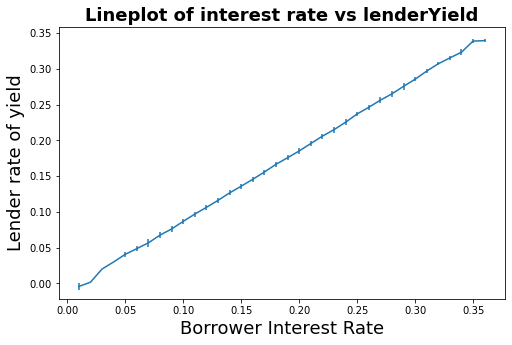

In [27]:
# Summary data
lenderyield_mean = tidy_loan_data['LenderYield'].groupby(interest_binned).mean()
lenderyield_std = tidy_loan_data['LenderYield'].groupby(interest_binned).std()

# Plot the summarized data
plt.figure(figsize = [8, 5])
plt.errorbar(x=bin_centers, y=lenderyield_mean,yerr=lenderyield_std)
plt.xticks(rotation=0)
plt.title('Lineplot of interest rate vs lenderYield',fontsize=18,weight='bold')
plt.xlabel('Borrower Interest Rate',fontsize=18 )
plt.ylabel('Lender rate of yield',fontsize=18);

#### There's a perfect positive correlation between the lender's yield and the interest rate, implying higher lenderYield result to equally higher interest rates.

<Figure size 576x360 with 0 Axes>

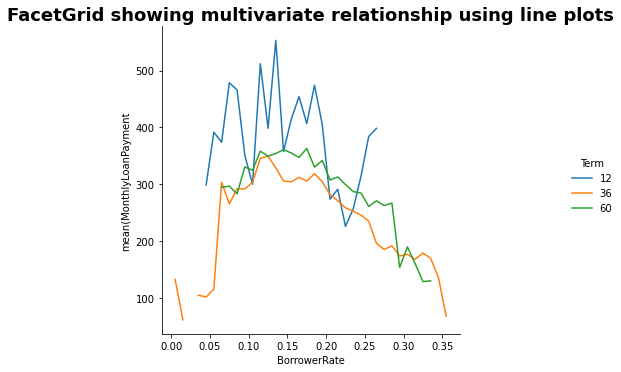

In [29]:
#Faceting lineplots
plt.figure(figsize = [8, 5])
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0, tidy_loan_data['BorrowerRate'].max()+0.01, 0.01)
g = sb.FacetGrid(data = tidy_loan_data, hue = 'Term', size = 5)
g.map(mean_poly, "BorrowerRate", "MonthlyLoanPayment", bins = bin_edges)
g.set_ylabels('mean(MonthlyLoanPayment')
plt.title('FacetGrid showing multivariate relationship using line plots',fontsize=18,weight='bold')
g.add_legend()
plt.show();

- At ~0.31 interest rate, monthly payment is equally low for both 36 and 60 months terms that have majority of the borrowers
- Interest rate are high when monthly payment are low for all the terms. Monthly payment are lowest for a loan taken for 3 years but but higher for a loan taken for  one year. However, a loan taken at  ~0.11 interest rate will have almost a similar monthly payment regardless of the term of payment.

### Question 4
- What affects the Loan outcome

In [30]:
tidy_loan_data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled'],
      dtype=object)

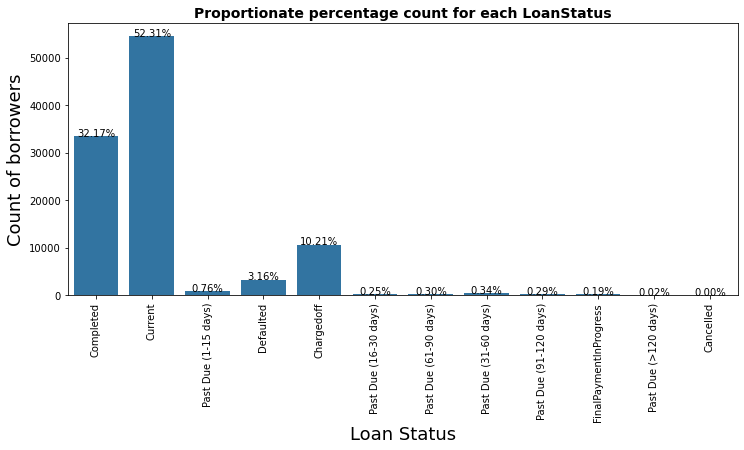

In [32]:
#Finding sum count of loan status
LoanStatus_count_sum=tidy_loan_data['LoanStatus'].value_counts().sum()

#Plotting
plt.figure(figsize = [12, 5])
base_color=sb.color_palette()[0]
ax=sb.countplot(data=tidy_loan_data, x='LoanStatus',color=base_color)

#Annotating
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/LoanStatus_count_sum)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',color='black')
plt.title('Proportionate percentage count for each LoanStatus',fontsize=14 ,weight='bold')
plt.xlabel('Loan Status',fontsize=18)
plt.ylabel('Count of borrowers',fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### The largest proportion of borrowers are servicing their loan. They are ~o.5 of all borrowers. Almost a third of the borrowers have completed payment of their loan. Only a  small number, of  ~0.05 of borrowers default or go beyond the due date without paying their loans. What status, contributes the largest and least proportotion of defaulters? Find solution in the next plot

In [36]:
tidy_loan_data['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Full-time', 'Other', 'Not employed',
       'Part-time', 'Retired'], dtype=object)

In [41]:
# Using group_by() and size() to get the number of  employmentStatus and each combination of the two variable levels as a pandas Series
counts_employmentStatus = tidy_loan_data.groupby(['EmploymentStatus','LoanStatus']).size()
counts_employmentStatus = counts_employmentStatus.reset_index(name='count')
counts_employmentStatus = counts_employmentStatus.pivot(index ='EmploymentStatus', columns = 'LoanStatus', values = 'count')

counts_employmentStatus 

LoanStatus,Cancelled,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
EmploymentStatus,,,,,,,,,,,,
Employed,0,3529,12320,48226,630,175,670,226,291,261,255,14
Full-time,1,5340,17378,1311,2216,10,28,7,13,11,12,0
Not employed,0,190,341,248,26,0,9,5,3,6,3,0
Other,0,295,436,1574,54,6,38,12,23,13,18,0
Part-time,0,202,791,24,59,0,2,1,2,1,2,0
Retired,0,180,459,92,58,0,2,0,2,1,1,0
Self-employed,0,896,1779,3005,246,10,44,13,22,18,13,2


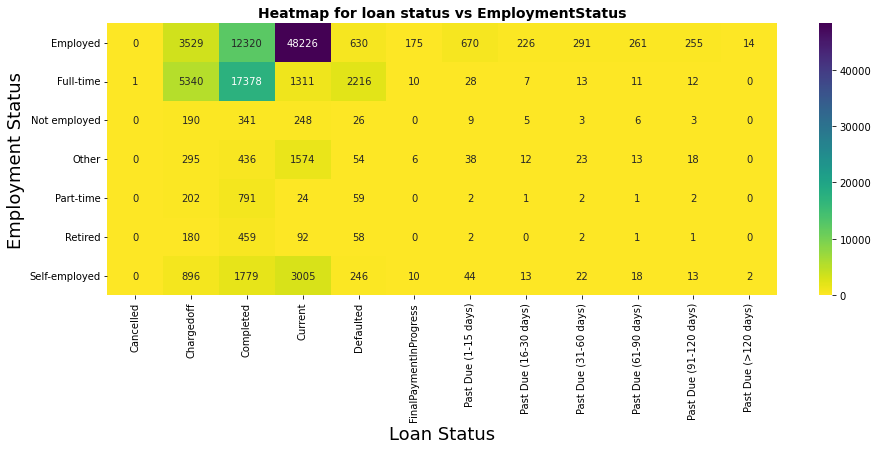

In [97]:
#Plotting heatmap
plt.figure(figsize = [15, 5])

sb.heatmap(counts_employmentStatus, annot = True, fmt='d',cmap='viridis_r')
plt.xticks(rotation=90)
plt.title('Heatmap showing counts for loan status vs EmploymentStatus',fontsize=14 ,weight='bold')
plt.xlabel('Loan Status',fontsize=18)
plt.ylabel('Employment Status', fontsize=18);



#### Full term  and employed personel are the leadind defaulters while the least defaulters are those who are not employed. Employed have the largest share of current loan. Interestingly this,full term and employed personel lead in completed loans

In [ ]:
sb.lineplot(data=tidy_loan_data)

In [64]:
tidy_loan_data['InquiriesLast6Months'].unique()

array([ 3.,  0.,  1.,  2.,  5.,  7.,  4., 11.,  6.,  9.,  8., 19., 42.,
       12., 10., 15., 13., 16., 14., 18., 22., 25., 28., 20., 26., 17.,
       21., 24., 41., 23., 30., 33., 31., 32., 34., 29., 36., 35., 44.,
       63., 27., 46., 37., 40., 50.])

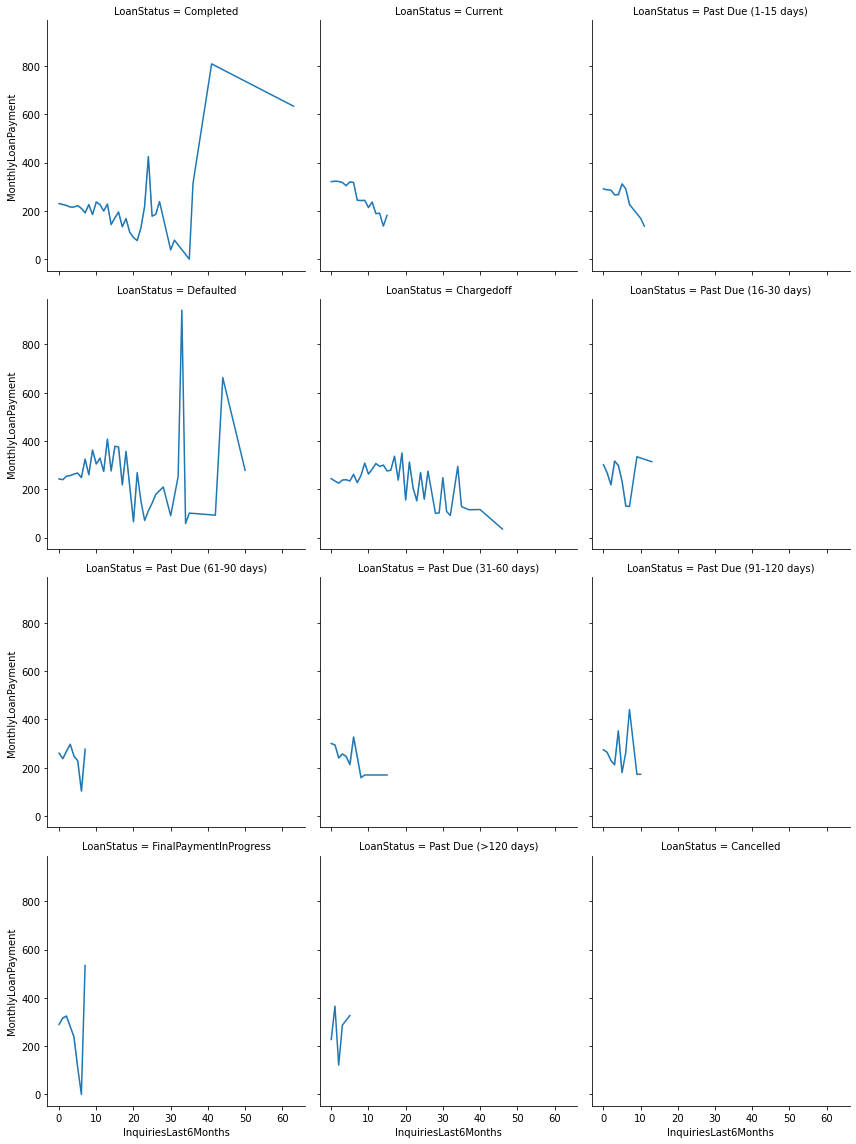

In [68]:
#Plotting facetgrid of line plots
g = sb.FacetGrid(data = tidy_loan_data,col = 'LoanStatus',col_wrap=3, size = 4,
                margin_titles = True)
g.map(sb.lineplot, 'InquiriesLast6Months', 'MonthlyLoanPayment', ci=0)

plt.show()



#### Inquiries in the last 6 months were made more by those with low monthly payment. However, for those with completed  and defaulted loan status, inquiries seemed to spike for those with higher monthly payment.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt